# Import Packages

In [1]:
from scipy.signal import periodogram
from statsmodels.tsa.stattools import acf, pacf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import itertools
sns.set(style="ticks")
%config IPCompleter.greedy = True
import datetime
from itertools import cycle



# self-written packages
import utils 

# Import Data

In [2]:
df_calendar, df_sales, df_prices = utils.import_m5_data()

# Computation on Store and Category Level

In [3]:
# Plot timeseries
store = 'TX_2'
cat = 'HOBBIES'


df = df_sales.loc[df_sales['store_id'] == store].loc[
    df_sales['cat_id'] == cat]
df = utils.transform_dataframe(df, df_calendar, df_prices)
df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
df.reset_index(level=df.index.names, inplace=True)



In [4]:
def forecast_snaive(df_hist, fh=28):
    forecast_sales = []
    forecast_dates = []
    last_date = pd.DatetimeIndex(df_hist['date'].tail(1))
    for i in cycle(reversed(range(1,8))):
        forecast_sales.append(df_hist['sale'].iloc[-i])
        forecast_dates.extend((last_date + pd.DateOffset(weeks=i)).format())
        if len(forecast_sales) == fh:
            break
    return pd.DataFrame({'date': forecast_dates, 'sale': forecast_sales})


In [5]:
fc = forecast_snaive(df, fh=28)

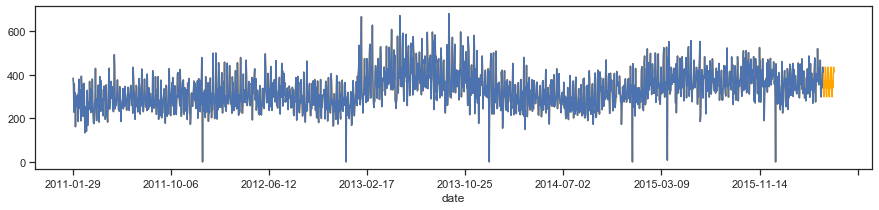

In [6]:
utils.plot_forecasts(df, fc)

In [7]:
df

,date,sale
0,2011-01-29,385
1,2011-01-30,359
2,2011-01-31,229
3,2011-02-01,359
4,2011-02-02,257
...,...,...
1908,2016-04-20,373
1909,2016-04-21,340
1910,2016-04-22,388
1911,2016-04-23,436
